In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy import stats

In [3]:
# Replace 'file_path.csv' with the path to your CSV file
file_path = 'de_experiment_results_parrallell_try_1000 copy.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Strategy  Popsize  MSE Overall Avg  MSE Overall Std  Elapsed Time Avg  \
0  best1bin       14        22.349119       164.357897        159.652773   
1  best1exp       14        10.606638        88.984012        174.623402   
2  rand1exp       14         3.808365        20.655519        179.922965   
3  rand1exp       14         3.808365        20.655519        177.305487   
4  rand2bin       14         3.724593        16.862016        142.562824   

   Elapsed Time Std  
0         44.278956  
1         57.171894  
2         48.684228  
3         44.393756  
4         63.432191  


In [4]:
strategies = df.loc[:, "Strategy"]
popsizes = df.loc[:, "Popsize"]
mse_overall_means = df.loc[:, "MSE Overall Avg"]
mse_overall_stds = df.loc[:, "MSE Overall Std"]
time_means = df.loc[:, "Elapsed Time Avg"]
time_stds = df.loc[:, "Elapsed Time Std"]

# Convert the selected columns into numpy arrays
strategies_arr = strategies.values
popsizes_arr = popsizes.values
mse_overall_means_arr = mse_overall_means.values
mse_overall_stds_arr = mse_overall_stds.values
time_means_arr = time_means.values
time_stds_arr = time_stds.values

In [5]:
index_of_best = np.argmin(mse_overall_means_arr)
best_strategy = strategies_arr[index_of_best]
best_popsize = popsizes_arr[index_of_best]
df.loc[index_of_best, :]

Strategy            randtobest1bin
Popsize                         56
MSE Overall Avg           0.002327
MSE Overall Std           0.073535
Elapsed Time Avg        557.919832
Elapsed Time Std         638.02011
Name: 80, dtype: object

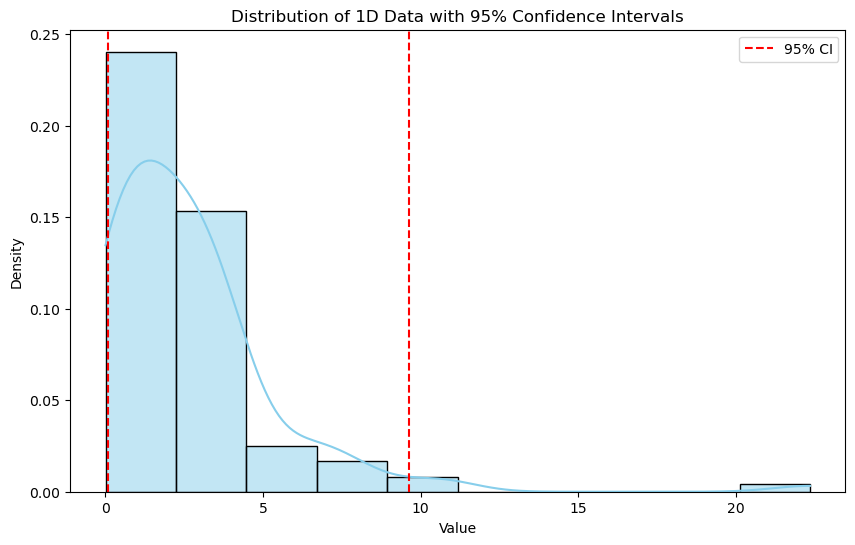

In [6]:
data = mse_overall_means_arr
# Calculate the mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data)

# Calculate the confidence interval
conf_interval = stats.expon.interval(0.95, scale=np.mean(data))

# Plot the histogram of the data with labeled 95% confidence intervals
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=10, kde=True, color='skyblue', stat='density')
plt.axvline(conf_interval[0], color='red', linestyle='--', label='95% CI')
plt.axvline(conf_interval[1], color='red', linestyle='--')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of 1D Data with 95% Confidence Intervals')
plt.legend()

# Plot the KDE of the data
# sns.kdeplot(data, color='purple', linewidth=2, label='KDE')

plt.legend()
plt.show()

In [103]:
values = mse_overall_means_arr.reshape(9, 12).T
valuestds = mse_overall_stds_arr.reshape(9, 12).T
time_means = time_means_arr.reshape(9, 12).T
time_stds = time_stds_arr.reshape(9, 12).T
coords = np.array(list(zip(strategies_arr, popsizes_arr)))
coords = coords.reshape(9, 12, 2).transpose(1, 0, 2)
values.shape, coords.shape

((12, 9), (12, 9, 2))

In [113]:
df.loc[index_of_best, :]

Strategy            randtobest1bin
Popsize                         56
MSE Overall Avg           0.002327
MSE Overall Std           0.073535
Elapsed Time Avg        557.919832
Elapsed Time Std         638.02011
Name: 80, dtype: object

In [117]:
ind = np.unravel_index(np.argmin(values), values.shape)
values[ind],coords[ind]

(0.0023273053044272, array(['randtobest1bin', '56'], dtype='<U21'))

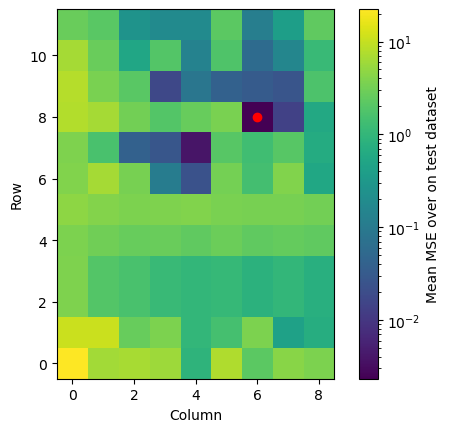

In [130]:
# colors_array_reshaped = colors.reshape(100, 1, 4)

# Display the colors using imshow
plt.imshow(values, cmap='viridis', aspect='equal', origin='lower', norm='log')
plt.plot(ind[1], ind[0], 'ro')
plt.xlabel('Column')
plt.ylabel('Row')
# plt.title('Heatmap of Array')
plt.colorbar(label='Mean MSE over on test dataset')
plt.show()

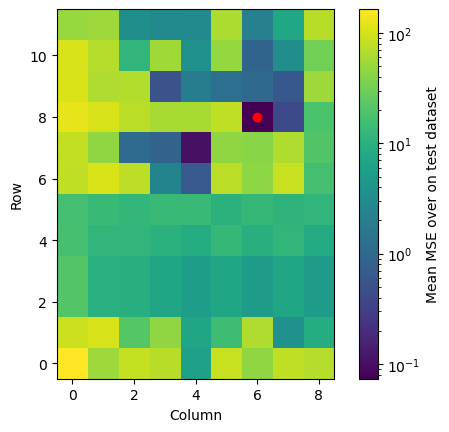

In [134]:
# colors_array_reshaped = colors.reshape(100, 1, 4)

# Display the colors using imshow
plt.imshow(valuestds, cmap='viridis', aspect='equal', origin='lower', norm='log')
plt.plot(ind[1], ind[0], 'ro')
plt.xlabel('Column')
plt.ylabel('Row')
# plt.title('Heatmap of Array')
plt.colorbar(label='Mean MSE over on test dataset')
plt.show()

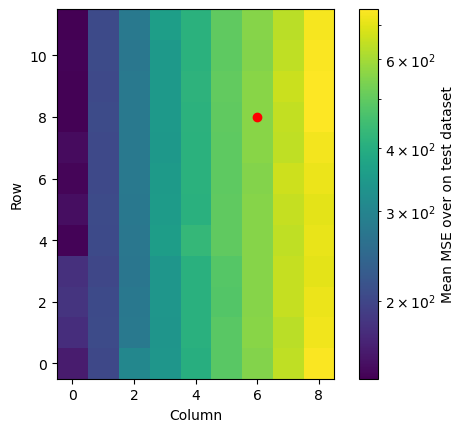

In [135]:
# colors_array_reshaped = colors.reshape(100, 1, 4)

# Display the colors using imshow
plt.imshow(time_means, cmap='viridis', aspect='equal', origin='lower', norm='log')
plt.plot(ind[1], ind[0], 'ro')
plt.xlabel('Column')
plt.ylabel('Row')
# plt.title('Heatmap of Array')
plt.colorbar(label='Mean MSE over on test dataset')
plt.show()

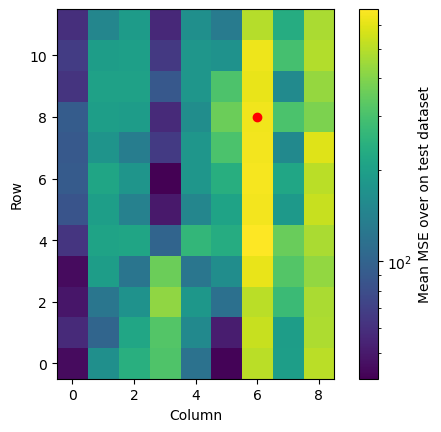

In [136]:
# colors_array_reshaped = colors.reshape(100, 1, 4)

# Display the colors using imshow
plt.imshow(time_stds, cmap='viridis', aspect='equal', origin='lower', norm='log')
plt.plot(ind[1], ind[0], 'ro')
plt.xlabel('Column')
plt.ylabel('Row')
# plt.title('Heatmap of Array')
plt.colorbar(label='Mean MSE over on test dataset')
plt.show()

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Example data: a 2D array representing the colormap
# data = np.random.randint(0, 6, size=(10, 10))

# Define colors for each value
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Create a ListedColormap
cmap = ListedColormap(colors)

# Plot the colormap
plt.imshow(np.column_stack((x, y)), cmap=cmap, interpolation='nearest')
plt.colorbar(label='Discrete Values')
plt.title('Colormap')
plt.show()


NameError: name 'x' is not defined